In [1]:
import numpy as np

ids = np.load("recipe_ids.dat")
dist_mat = np.load("dist_matrix.dat")
dist_mat = dist_mat + dist_mat.T - np.diag(dist_mat.diagonal())

dist_mat.shape

(370, 370)

In [2]:
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [3]:
#make 2d embedding
mds2 = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=4)
embed2d = mds2.fit(dist_mat).embedding_ #xy-coordinates converted from distance matrix

In [4]:
#Setup plots
fig = plt.figure(figsize=(50,15))

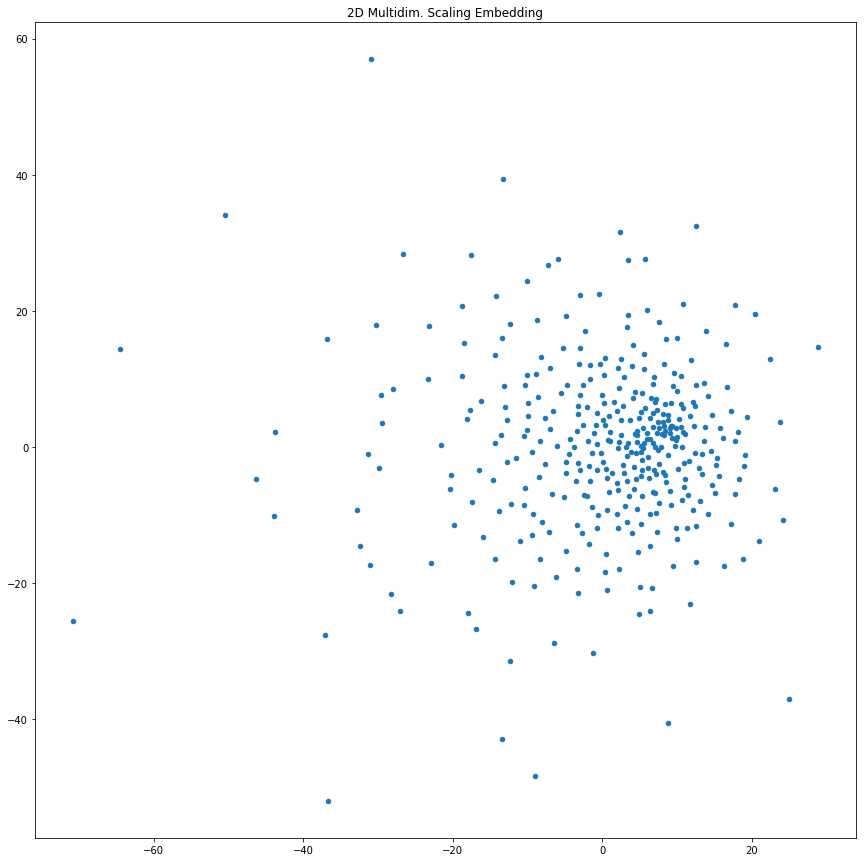

In [5]:
# plot 2d embedding
subpl2 = fig.add_subplot(133)
subpl2.set_autoscaley_on(False)
subpl2.scatter(embed2d[:, 0], embed2d[:, 1], s=20)
plt.title('2D Multidim. Scaling Embedding')
plt.axis('tight')

plt.show()

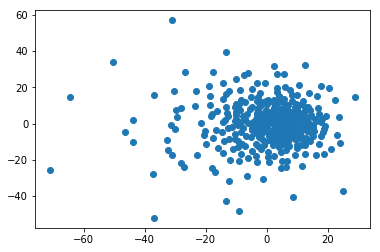

In [6]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

X = embed2d

plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:

# generate the linkage matrix
Z = linkage(X, 'ward')


from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.59661016834864466

In [8]:
Z[:20]

array([[  72.     ,  326.     ,    0.23938,    2.     ],
       [ 109.     ,  324.     ,    0.33818,    2.     ],
       [  17.     ,   25.     ,    0.36028,    2.     ],
       [  88.     ,  174.     ,    0.37571,    2.     ],
       [  20.     ,  255.     ,    0.38284,    2.     ],
       [  95.     ,  275.     ,    0.3965 ,    2.     ],
       [  63.     ,  231.     ,    0.40155,    2.     ],
       [ 145.     ,  183.     ,    0.42528,    2.     ],
       [ 173.     ,  281.     ,    0.4275 ,    2.     ],
       [  11.     ,  370.     ,    0.45627,    3.     ],
       [ 126.     ,  199.     ,    0.4941 ,    2.     ],
       [ 330.     ,  345.     ,    0.49662,    2.     ],
       [ 148.     ,  344.     ,    0.5341 ,    2.     ],
       [ 266.     ,  280.     ,    0.58626,    2.     ],
       [  55.     ,   58.     ,    0.60812,    2.     ],
       [ 245.     ,  283.     ,    0.61081,    2.     ],
       [ 111.     ,  206.     ,    0.62184,    2.     ],
       [ 258.     ,  372.     ,

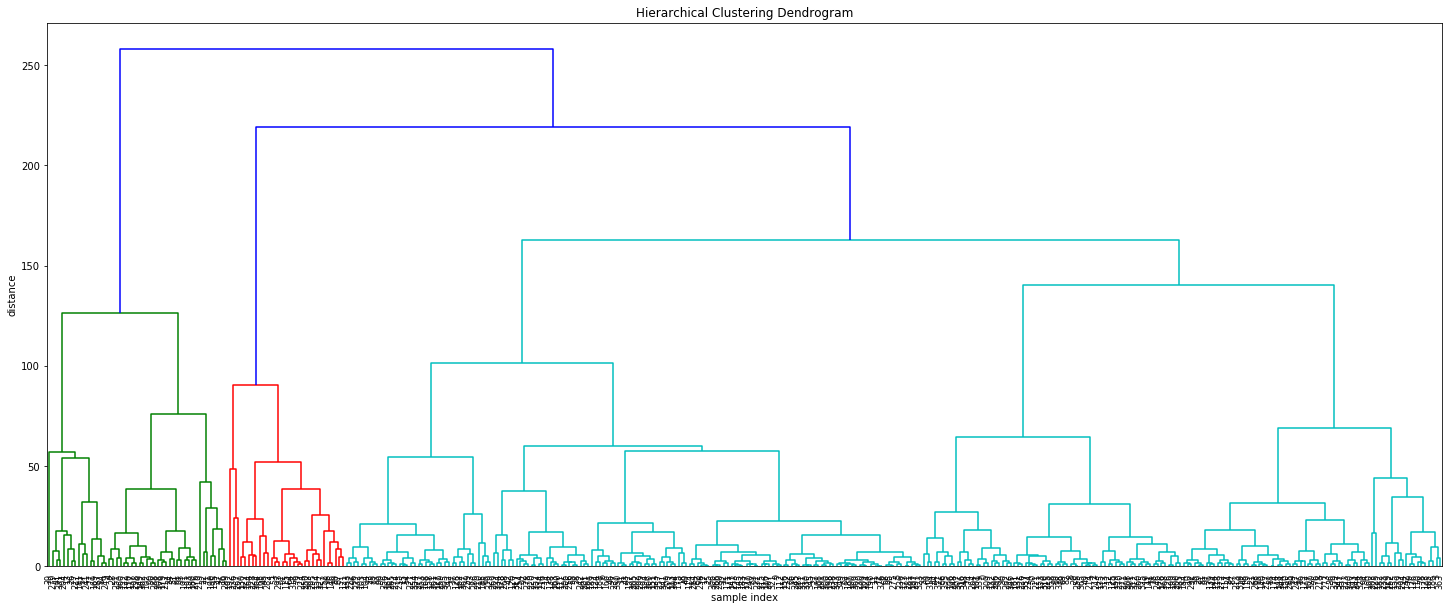

In [9]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

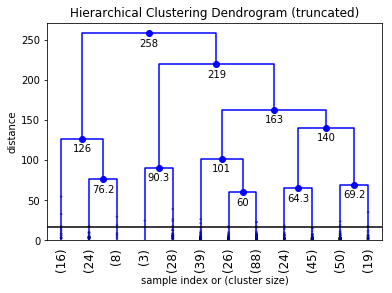

In [10]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=16,
)
plt.show()

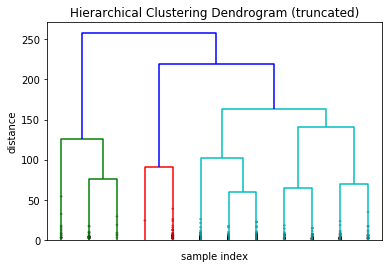

In [11]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [12]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[  9.93542,  12.50959,  30.     ,   4.34964],
       [ 14.79132,  15.5983 ,  25.     ,   3.48783],
       [ 14.84174,  17.74194,  22.     ,   3.4582 ],
       [ 23.38212,  22.81357,  17.     ,   2.93265],
       [ 20.11769,  21.85653,  30.     ,   3.72148],
       [ 29.3559 ,  29.32124,  21.     ,   3.30268],
       [ 23.82014,  27.63764,  29.     ,   4.21035],
       [ 38.89694,  36.92837,  31.     ,   3.35335],
       [ 57.36364,  49.83113,  26.     ,   3.25142],
       [ 73.65802,  61.8147 ,  26.     ,   2.98583]])

In [13]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]

array([[  26.23798,   18.07044,    7.     ,    2.10895],
       [  33.99978,   18.33136,    7.     ,    1.91998],
       [  36.70846,   22.04002,    6.     ,    1.79167],
       [  46.25272,   24.61583,    6.     ,    1.78883],
       [  51.16352,   27.03985,    7.     ,    1.85995],
       [  65.72863,   32.43406,    6.     ,    1.86427],
       [  58.23926,   39.77299,    7.     ,    2.06032],
       [  93.23563,   43.0129 ,    7.     ,    1.61568],
       [ 116.37899,   61.8685 ,    7.     ,    1.66493],
       [ 141.4196 ,   75.7385 ,    7.     ,    1.54224]])

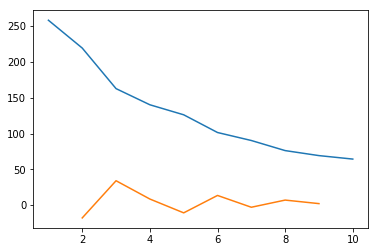

clusters: 3


In [14]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [15]:
from scipy.cluster.hierarchy import fcluster
max_d = 100 #this is a parameter
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([6, 3, 6, 7, 2, 5, 5, 7, 6, 5, 7, 5, 6, 1, 5, 4, 2, 5, 5, 6, 6, 7, 2,
       4, 7, 5, 1, 5, 2, 7, 6, 5, 5, 6, 2, 7, 7, 4, 6, 1, 5, 1, 5, 5, 6, 3,
       5, 2, 7, 6, 6, 2, 5, 3, 4, 5, 6, 1, 5, 7, 6, 2, 5, 5, 3, 4, 5, 3, 5,
       6, 7, 2, 5, 4, 6, 4, 7, 1, 7, 3, 3, 7, 6, 4, 1, 7, 7, 7, 7, 6, 2, 3,
       5, 2, 7, 5, 4, 7, 3, 4, 5, 6, 2, 4, 4, 7, 6, 7, 5, 5, 7, 5, 5, 5, 5,
       3, 5, 7, 7, 7, 5, 3, 2, 7, 5, 6, 6, 4, 4, 7, 3, 6, 6, 4, 5, 6, 7, 2,
       5, 7, 7, 6, 7, 7, 7, 5, 3, 5, 7, 2, 7, 5, 3, 6, 3, 7, 5, 5, 4, 6, 7,
       6, 4, 5, 3, 3, 5, 4, 4, 1, 2, 5, 7, 5, 7, 5, 6, 5, 5, 2, 2, 1, 7, 5,
       7, 4, 7, 5, 5, 5, 2, 2, 3, 2, 5, 2, 5, 5, 5, 6, 6, 5, 5, 7, 1, 5, 5,
       5, 6, 5, 4, 6, 2, 7, 6, 6, 5, 7, 7, 2, 5, 4, 4, 7, 3, 7, 6, 1, 3, 4,
       5, 5, 5, 7, 6, 4, 3, 5, 5, 7, 5, 1, 5, 6, 7, 5, 6, 7, 6, 1, 3, 2, 7,
       5, 5, 6, 5, 5, 5, 4, 6, 5, 6, 7, 6, 4, 5, 3, 5, 5, 6, 6, 7, 7, 4, 5,
       2, 4, 5, 1, 5, 5, 3, 5, 5, 7, 4, 1, 2, 2, 5, 5, 7, 3, 7, 3, 6, 5, 2,
       5, 5,

In [16]:
result = np.column_stack((ids.T, embed2d, clusters))

In [22]:
result.dump("clustering_result.dat")

In [18]:
# from scipy.cluster.hierarchy import fcluster
# fcluster(Z, 8, depth=10)

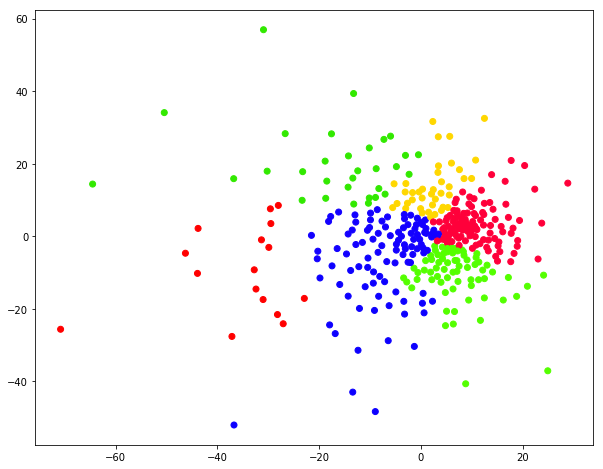

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [20]:
import math
def dist(x1,y1,x2,y2):
    return math.hypot(x2-x1, y2-y1)

rep_points = []
for clust in list(set(clusters)):
    points = []
    for i in result:
        if int(i.item(0,3)) == clust:
            points.append(i)
    
    x = [float(p.item(0,1)) for p in points]
    y = [float(p.item(0,2)) for p in points]
    centroid = (sum(x) / len(points), sum(y) / len(points))
    
    min_val = 99999
    min_p = points[0]
    
    for p in points:
        if dist(float(p.item(0,1)),float(p.item(0,2)), centroid[0], centroid[1]) < min_val:
            min_val = dist(float(p.item(0,1)),float(p.item(0,2)), centroid[0], centroid[1])
            min_p = p
    
    rep_points.append(min_p)

    

In [23]:
rep_points = np.array(rep_points)
rep_points.dump("rep_points.dat")